# BREAST CANCER DATASET CLASSIFICATION
***

## Importing the required Libraries
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

## Loading the dataset
***

Loading the breast cancer dataset through the link and putting it into 'df' dataframe using pandas

In [3]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


***
As df is not having column names we add the column names 

In [4]:
df.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


***
Converting df into excel sheet

In [5]:
#df.to_excel(r'C:\Users\keganji\Desktop\ML Project\breastCancer.xlsx', index = False, header=True)

***
Fetching the top 5 data samples from df

In [6]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


***
Now fetching the bottom 5 samples of df

In [7]:
df.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


***
Finding the size of df

In [8]:
df.shape

(699, 11)

***
## Summarizing the dataset
***

describe() in pandas can be used to get the summary of the dataframe which gives us the count, mean, median, standard deviation, minimum value, maximum value, 25%,50% and 75% of each attribute column of the dataframe

In [9]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


***
The sample code number attribute is an id of sample so we can drop that column and find create dataframe 'df1' which excludes the sample code number column

In [10]:
df1=df.drop('Sample code number', axis=1)
df1

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


***
Plotting graph for df1:

<AxesSubplot:>

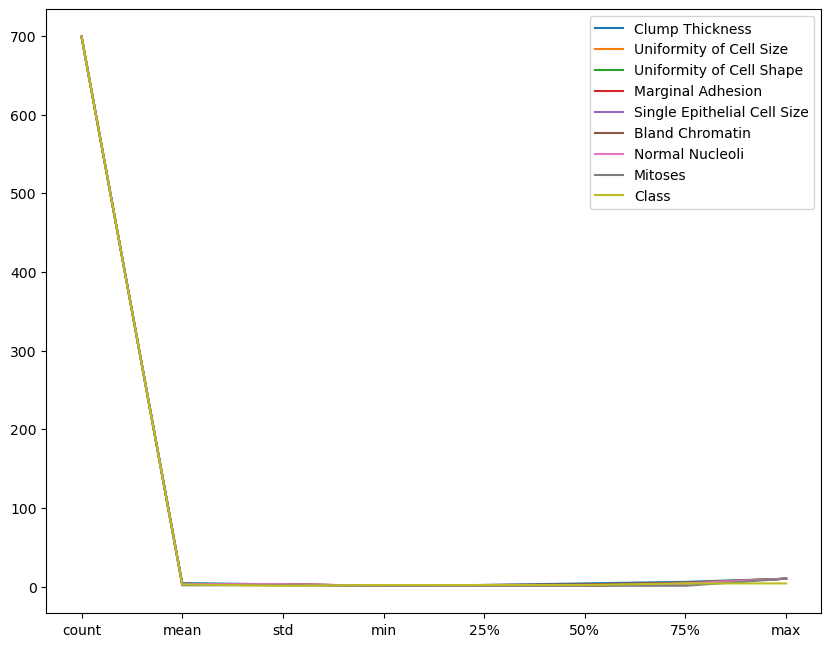

In [11]:
df1.describe().plot()

***
Similar to describe() in pandas, we also have aggregate() in pandas which helps us to find the min, max, mean, count, sum for the attribute columns of dataframe.

In [12]:
df1.aggregate({sum,min,max,np.mean})

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
mean,4.41774,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
sum,3088.00000,2191.000000,2242.000000,1962.000000,2248.000000,1102411010111113391111011071?17111111511111107...,2403.000000,2004.000000,1111.000000,1880.000000
min,1.00000,1.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,1.000000,2.000000
max,10.00000,10.000000,10.000000,10.000000,10.000000,?,10.000000,10.000000,10.000000,4.000000


***
Now, we plot a graph excluding the count, to get a broader view about the variations among variables in the aspects of min, 25%, 50%, 75%, max, mean.

<AxesSubplot:>

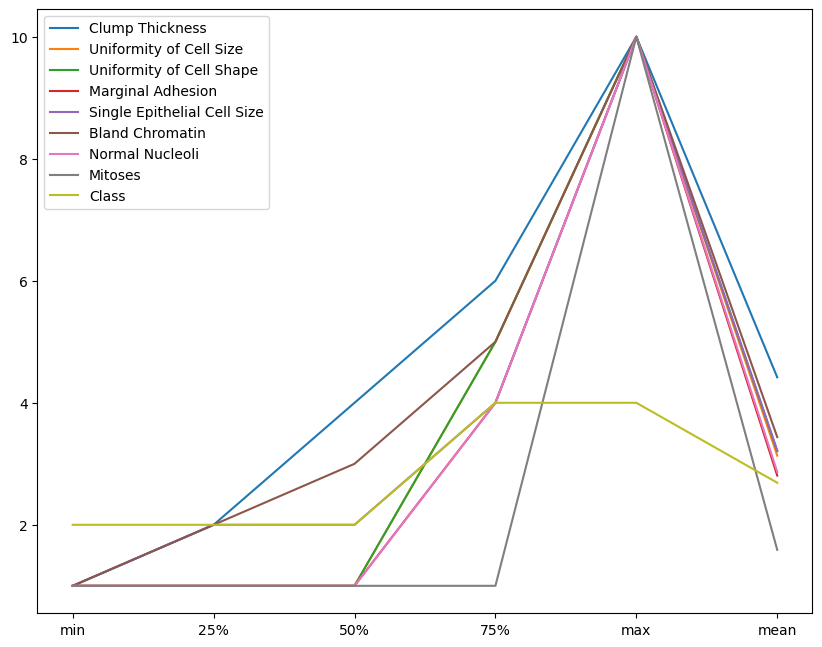

In [13]:
df1.describe().loc[['min','25%', '50%','75%','max','mean']].plot()

***
It is seen from the above graph that the values are varying from 1-10 in all the attributes except for <font color=red>Sample code number</font> and <font color= red>Class</font>

So, we'll see if any duplicates are present in those attribute columns and explore more in the following:

In [14]:
boolean = df['Sample code number'].duplicated().any()
boolean

True

In [15]:
df['Sample code number'].unique()

array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
        1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
        1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
        1050718,  1054590,  1054593,  1056784,  1057013,  1059552,
        1065726,  1066373,  1066979,  1067444,  1070935,  1071760,
        1072179,  1074610,  1075123,  1079304,  1080185,  1081791,
        1084584,  1091262,  1096800,  1099510,  1100524,  1102573,
        1103608,  1103722,  1105257,  1105524,  1106095,  1106829,
        1108370,  1108449,  1110102,  1110503,  1110524,  1111249,
        1112209,  1113038,  1113483,  1113906,  1115282,  1115293,
        1116116,  1116132,  1116192,  1116998,  1117152,  1118039,
        1120559,  1121732,  1121919,  1123061,  1124651,  1125035,
        1126417,  1131294,  1132347,  1133041,  1133136,  1136142,
        1137156,  1143978,  1147044,  1147699,  1147748,  1148278,
        1148873,  1152331,  1155546,  1156272,  1156948,  1157

In [16]:
len(df['Sample code number'].unique())

645

In [17]:
len(df['Sample code number'])

699

In [18]:
len(df['Class'].unique())

2

In [19]:
df['Class'].unique().tolist()

[2, 4]

Finding the number of values in each class

In [20]:
df.groupby(['Class']).count()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


***
Here, we can find that there are 2 values of Class by which the data varying. Let us group them and look for the max, min, mean variations.

In [21]:
df.loc[:, df.columns != 'Sample code number'].groupby('Class').aggregate([max,min])

Clump Thickness     Uniformity of Cell Size      \
                  max min                     max min   
Class                                                   
2                   8   1                       9   1   
4                  10   1                      10   1   

      Uniformity of Cell Shape     Marginal Adhesion      \
                           max min               max min   
Class                                                      
2                            8   1                10   1   
4                           10   1                10   1   

      Single Epithelial Cell Size     Bare Nuclei     Bland Chromatin      \
                              max min         max min             max min   
Class                                                                       
2                              10   1           ?   1               7   1   
4                              10   1           ?   1              10   1   

      Normal Nucleoli     Mitoses      
                  max min     max min  
Class                                  
2                   9   1       8   1  
4                  10   1      10   1

In [22]:
df.loc[:, df.columns != 'Sample code number'].groupby('Class').aggregate(np.mean)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,
2,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319
4,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212


***
## Visualizing the data

***
Sample plotting of the entire dataframe

<AxesSubplot:>

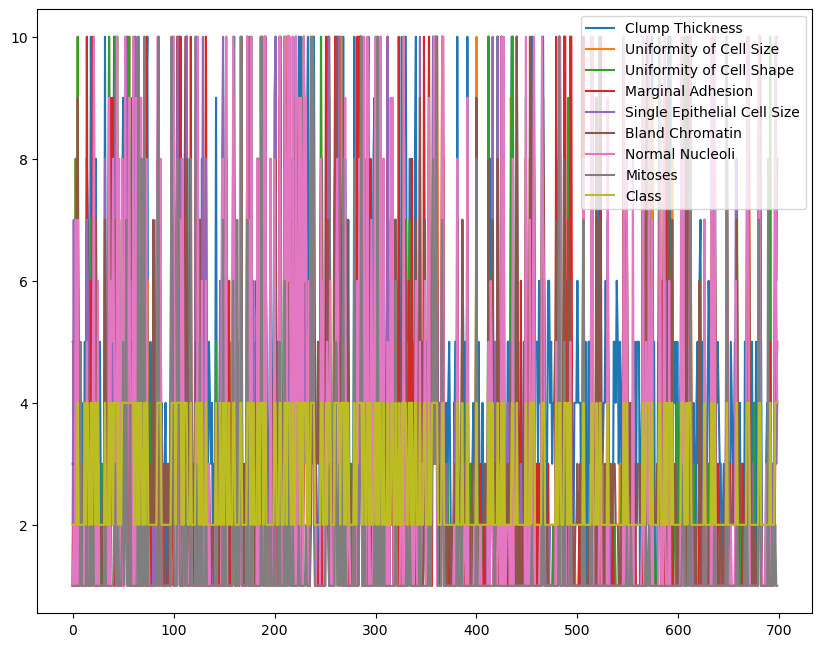

In [23]:
df.loc[:, df.columns != 'Sample code number'].plot()

***
### Univariate Plots

Histograms:

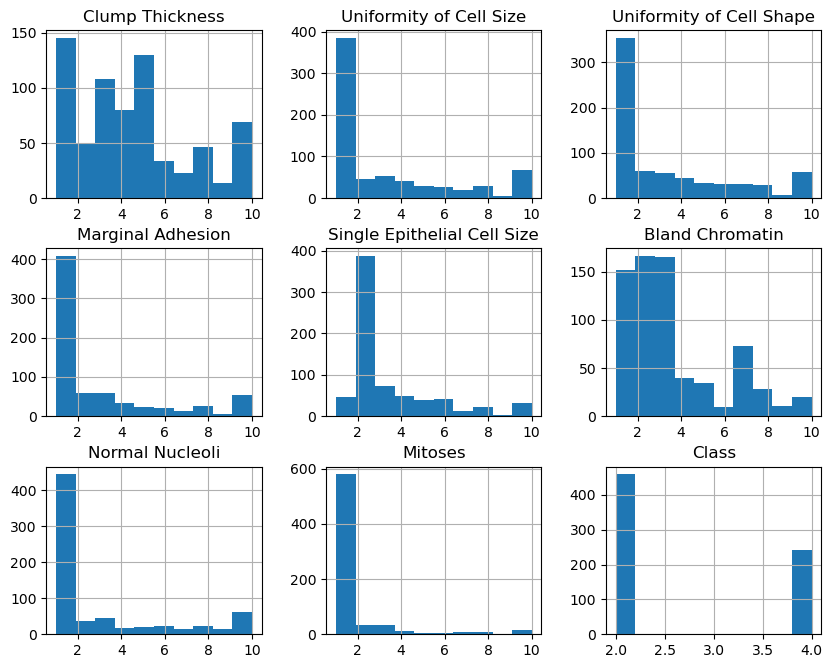

In [24]:
df1.hist()
plt.show()

***
Density plots:

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

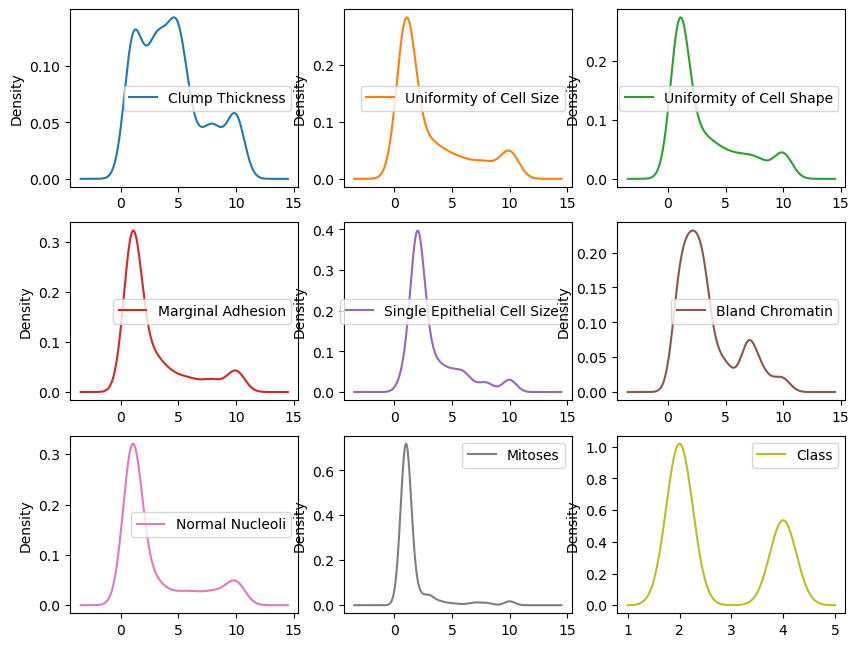

In [25]:
df1.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

***
Box Plots:

Clump Thickness                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
Uniformity of Cell Size        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Uniformity of Cell Shape       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Marginal Adhesion                 AxesSubplot(0.125,0.391471;0.227941x0.222059)
Single Epithelial Cell Size    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Bland Chromatin                AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Normal Nucleoli                      AxesSubplot(0.125,0.125;0.227941x0.222059)
Mitoses                           AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                             AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

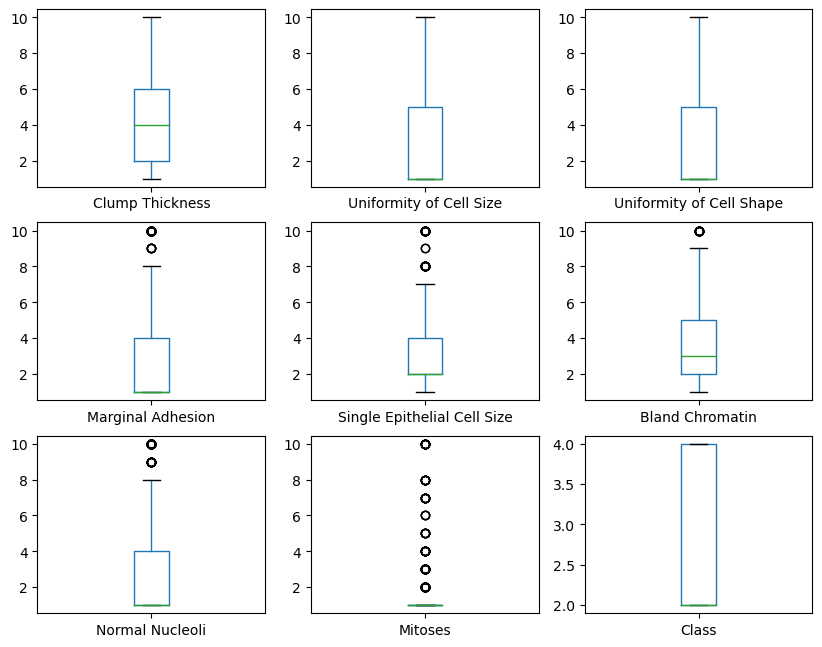

In [26]:
df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

***
### Multivariate Plots

Pair Plot:

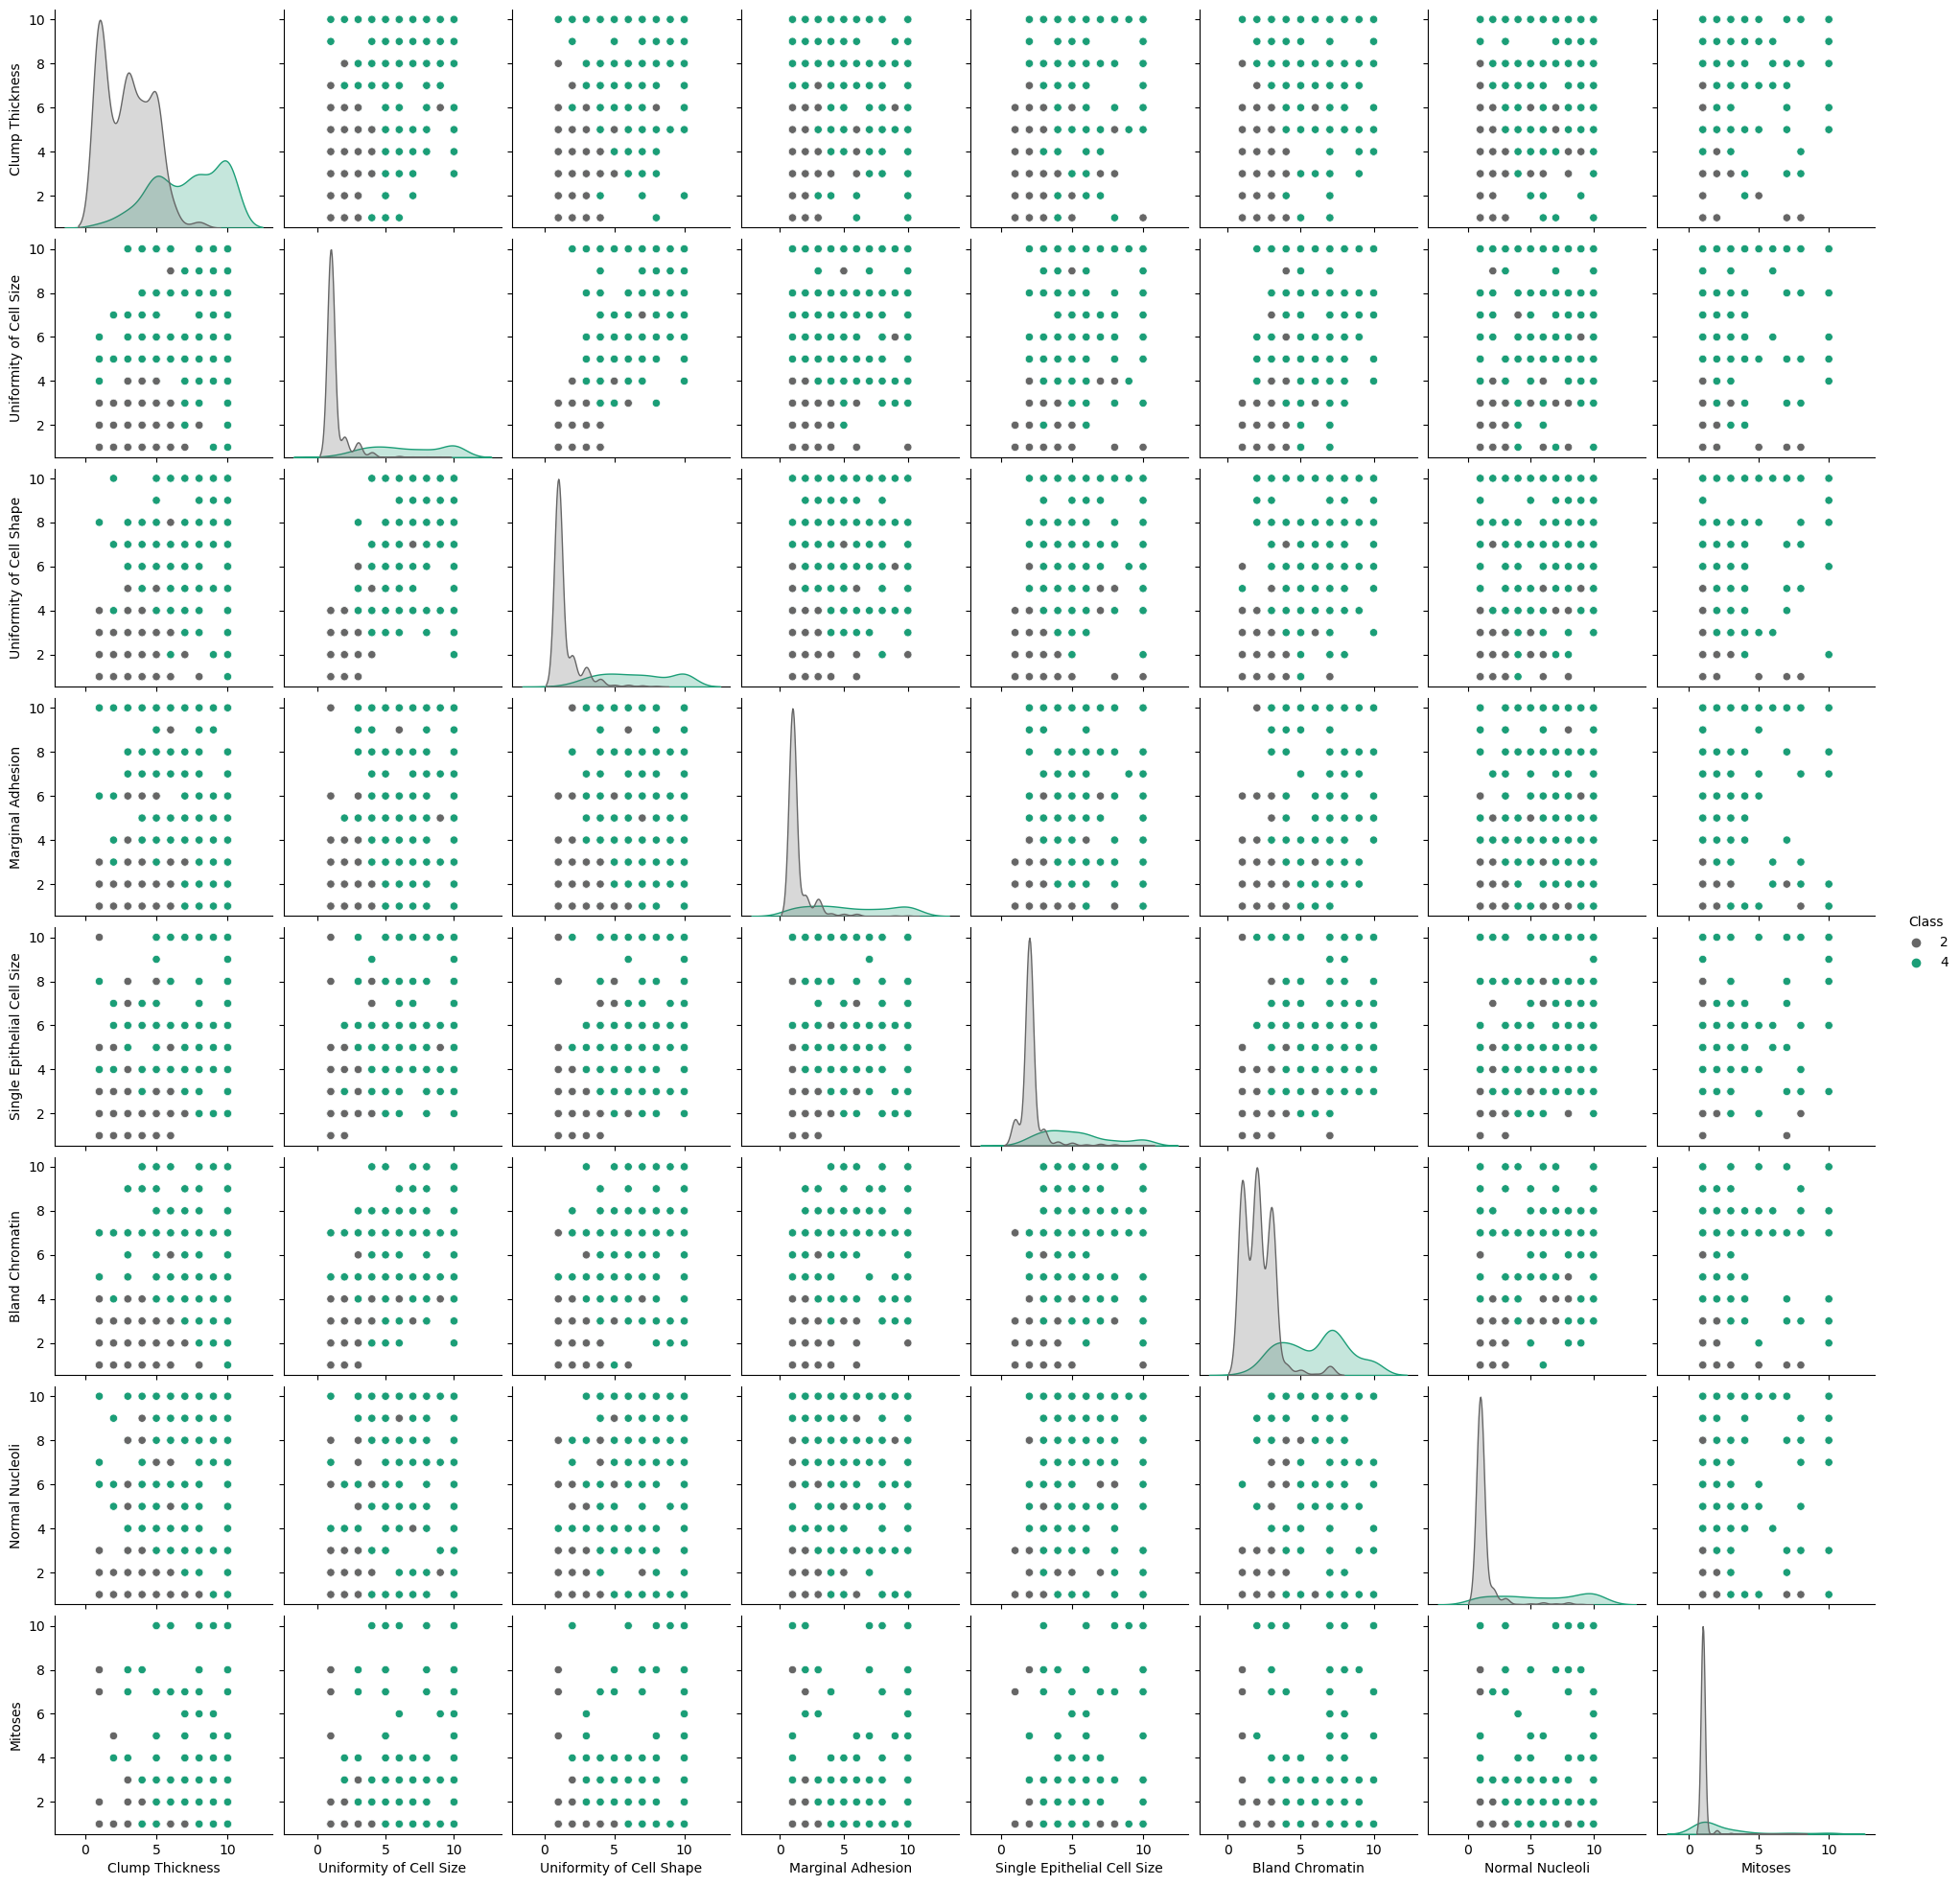

In [27]:
sns.pairplot(df1, hue='Class', palette='Dark2_r')

***
Grouped Boxplot:

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>

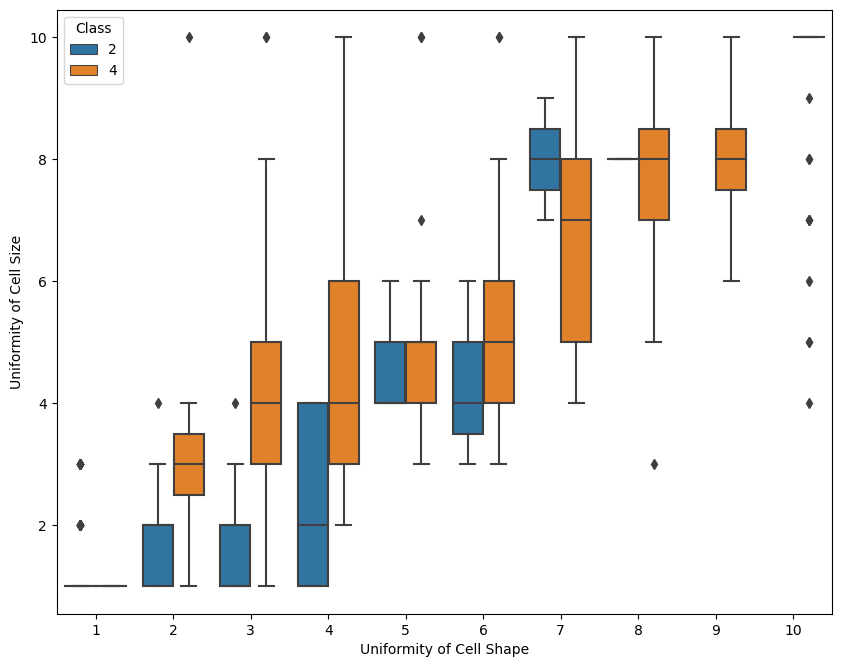

In [28]:
sns.boxplot(x='Uniformity of Cell Shape', y='Uniformity of Cell Size', hue='Class', data=df1)

***
Scatter plot:

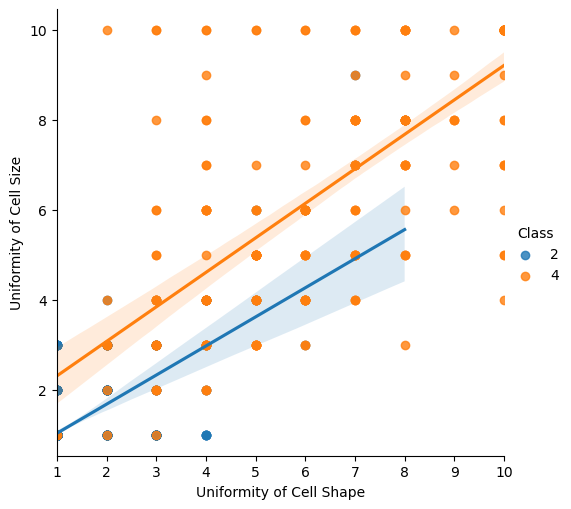

In [29]:
sns.lmplot(x='Uniformity of Cell Shape', y='Uniformity of Cell Size', hue='Class', data=df1)

***
Heatmap for understanding the correlation among the attributes

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Clump Thickness'),
  Text(1.5, 0, 'Uniformity of Cell Size'),
  Text(2.5, 0, 'Uniformity of Cell Shape'),
  Text(3.5, 0, 'Marginal Adhesion'),
  Text(4.5, 0, 'Single Epithelial Cell Size'),
  Text(5.5, 0, 'Bland Chromatin'),
  Text(6.5, 0, 'Normal Nucleoli'),
  Text(7.5, 0, 'Mitoses'),
  Text(8.5, 0, 'Class')])

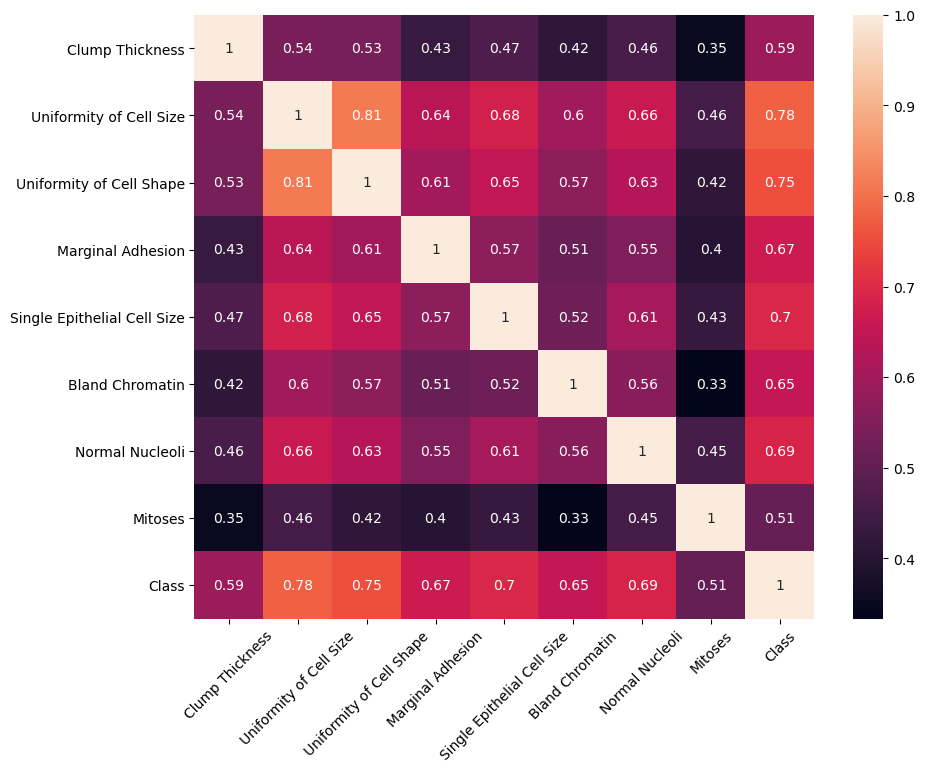

In [30]:
sns.heatmap(df1.corr(method='kendall'),annot=True)
plt.xticks(rotation=45)

 ## Data Pre - Processing
 ***

Loading the Data Frame and replacing "?" with nan

In [31]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None,na_values="?")


Assigning the Column Values.....

In [32]:
df.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


Dropping Sample Number as it is just an Id to represent..

In [33]:
#df.drop('Sample code number', axis=1,inplace=True)

In [34]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [35]:
df1=df.copy()
df1

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [36]:
df1["Class"] = df1["Class"].replace([2,4],[0,1])
df1

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


# Finding Outliers

Identifying Outliers with Skewness(Values should be between -1 and +1), IQR(InterQuartile Range)

In [37]:
df1.skew()

Sample code number             13.675326
Clump Thickness                 0.592859
Uniformity of Cell Size         1.233137
Uniformity of Cell Shape        1.161859
Marginal Adhesion               1.524468
Single Epithelial Cell Size     1.712172
Bare Nuclei                     0.990016
Bland Chromatin                 1.099969
Normal Nucleoli                 1.422261
Mitoses                         3.560658
Class                           0.654564
dtype: float64

Creating a copy of df1(df when outliers are not treated)

In [38]:
df_copy=df1.copy()

In [39]:
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sample code number             367609.5
Clump Thickness                     4.0
Uniformity of Cell Size             4.0
Uniformity of Cell Shape            4.0
Marginal Adhesion                   3.0
Single Epithelial Cell Size         2.0
Bare Nuclei                         5.0
Bland Chromatin                     3.0
Normal Nucleoli                     3.0
Mitoses                             0.0
Class                               1.0
dtype: float64


In [40]:
#print(df_copy < (Q1 - 1.5 * IQR)) |(df_copy > (Q3 + 1.5 * IQR))

In [41]:
df_copy = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) |(df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_copy.shape)

(491, 11)


## Imputing the Missing Values
Finding out Missing Values in Each Column of df_copy(dataframe where the outliers are removed)

In [42]:
df_copy.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    11
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Finding out Missing Values in Each Column of df1(dataframe where the outliers are not removed)

In [43]:
df1.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

As we find out Missing values so fiiling those with Mean of that Column

In [44]:
w=df_copy["Bare Nuclei"].mean()
df_copy["Bare Nuclei"].fillna(w,inplace=True)
df_copy

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
690,654546,1,1,1,3,2,1.0,1,1,1,0
691,695091,5,10,10,5,4,5.0,4,4,1,1
692,714039,3,1,1,1,2,1.0,1,1,1,0
694,776715,3,1,1,1,3,2.0,1,1,1,0


In [45]:
w=df1["Bare Nuclei"].mean()
df1["Bare Nuclei"].fillna(w,inplace=True)
df1

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


Checking whether those missing values are filled or not , Similarly we can fill with Mode,Median etc.

In [46]:
df1.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [47]:
df_copy.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# DATA VISUALIZATION AFTER TREATING THE MISSING VALUES

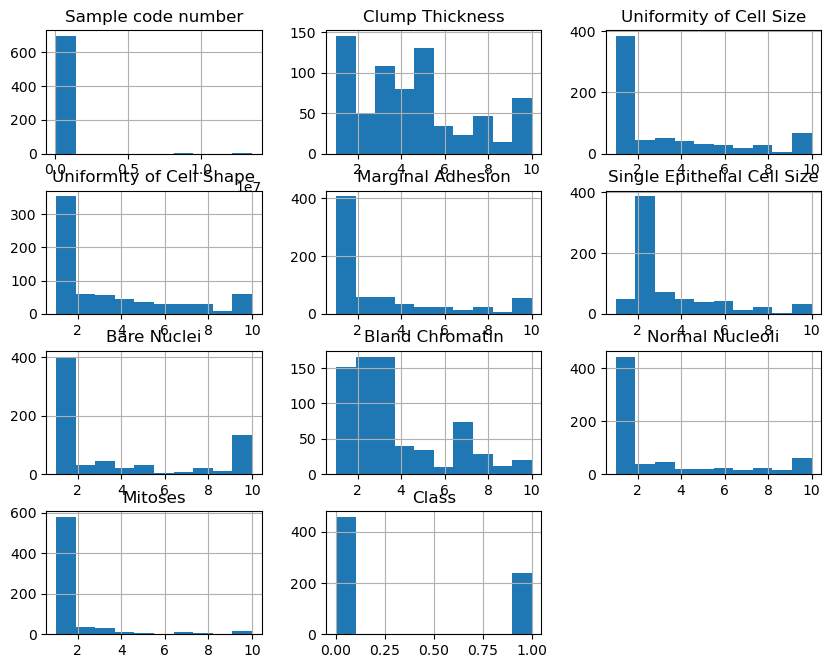

In [48]:
df1.hist()
plt.show()

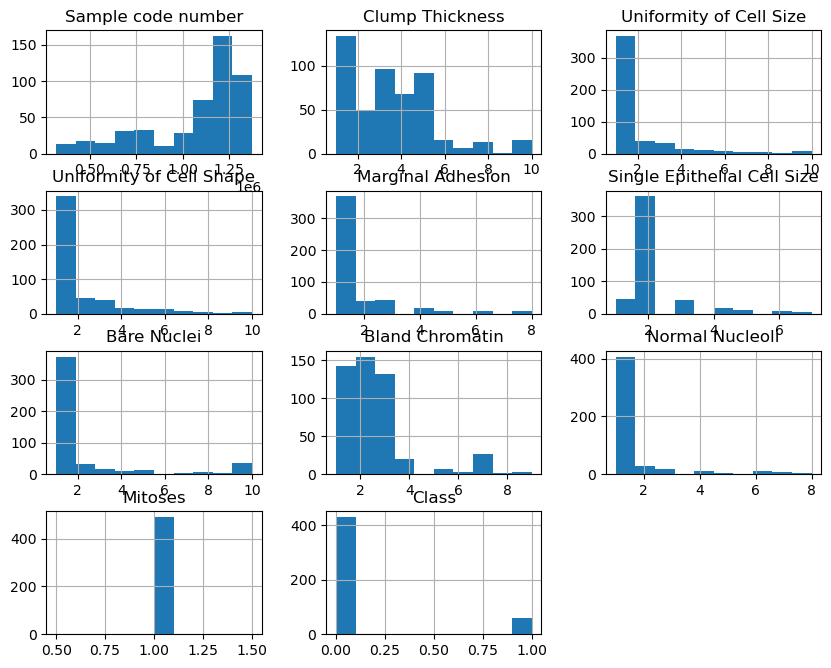

In [49]:
df_copy.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

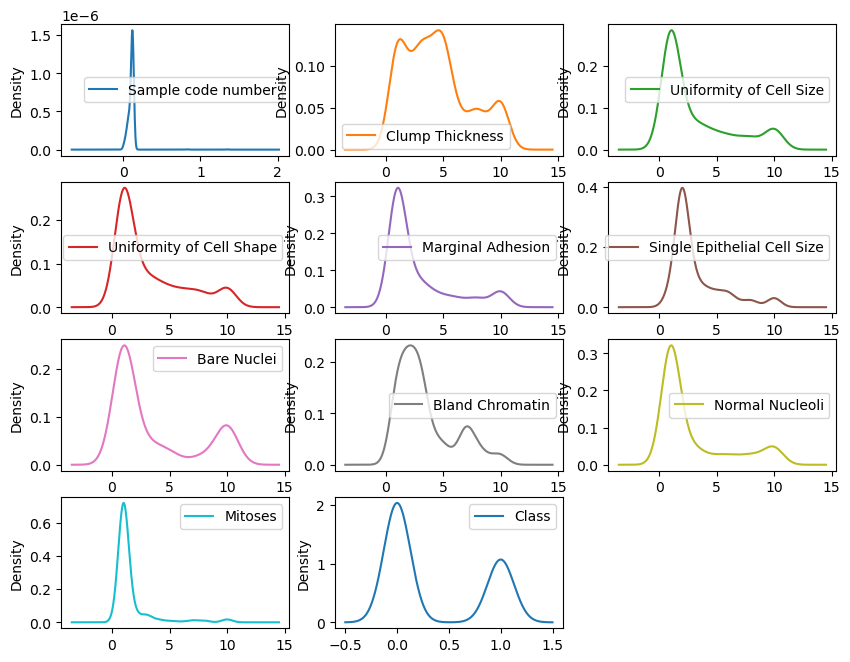

In [50]:
df1.plot(kind='density', subplots=True, layout=(4,3), sharex=False)

In [51]:
#df_copy.plot(kind='density', subplots=True, layout=(4,3), sharex=False)

Sample code number                 AxesSubplot(0.125,0.71587;0.227941x0.16413)
Clump Thickness                 AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Uniformity of Cell Size         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Uniformity of Cell Shape          AxesSubplot(0.125,0.518913;0.227941x0.16413)
Marginal Adhesion              AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Single Epithelial Cell Size    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Bare Nuclei                       AxesSubplot(0.125,0.321957;0.227941x0.16413)
Bland Chromatin                AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Normal Nucleoli                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Mitoses                              AxesSubplot(0.125,0.125;0.227941x0.16413)
Class                             AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

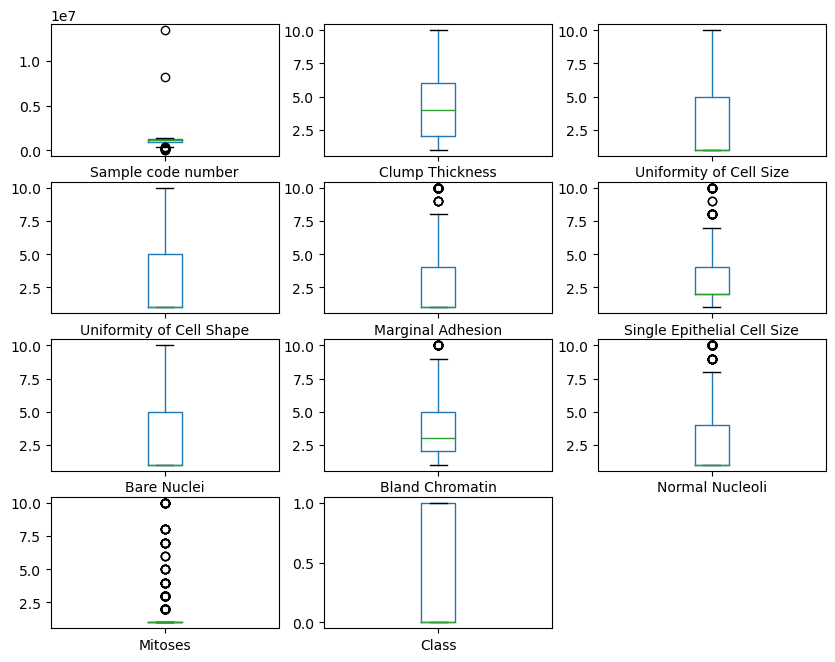

In [52]:
df1.plot(kind='box', subplots=True, layout=(4,3), sharex=False)

Sample code number                 AxesSubplot(0.125,0.71587;0.227941x0.16413)
Clump Thickness                 AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Uniformity of Cell Size         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Uniformity of Cell Shape          AxesSubplot(0.125,0.518913;0.227941x0.16413)
Marginal Adhesion              AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Single Epithelial Cell Size    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Bare Nuclei                       AxesSubplot(0.125,0.321957;0.227941x0.16413)
Bland Chromatin                AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Normal Nucleoli                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Mitoses                              AxesSubplot(0.125,0.125;0.227941x0.16413)
Class                             AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

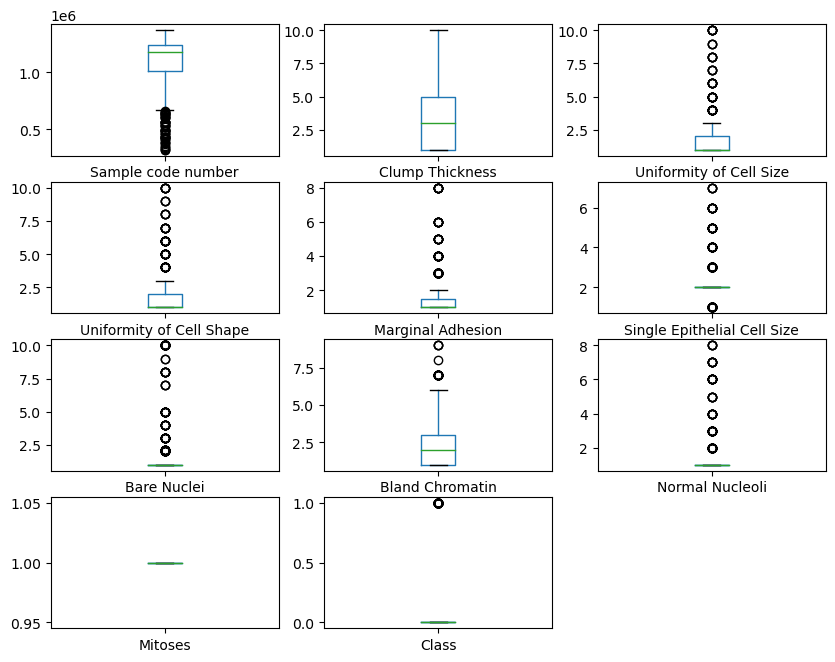

In [53]:
df_copy.plot(kind='box', subplots=True, layout=(4,3), sharex=False)

### VIF(Variance Inflation Factor) of the dataset

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df1[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Clump Thickness,5.218245
1,Uniformity of Cell Size,13.952064
2,Uniformity of Cell Shape,14.111348
3,Marginal Adhesion,4.823664
4,Single Epithelial Cell Size,6.824755
5,Bare Nuclei,4.942268
6,Bland Chromatin,7.543046
7,Normal Nucleoli,4.546678
8,Mitoses,2.547882


So we can find from above that there is a correlation between uniformity of cell shape and uniformity of cell size, We now create another dataframe df2 by removing uniformity of cell shape from df1

In [55]:
df2=df1.drop('Uniformity of Cell Shape', axis=1)
df2

,Sample code number,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,2,1.0,3,1,1,0
1,1002945,5,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,2,2.0,3,1,1,0
3,1016277,6,8,1,3,4.0,3,7,1,0
4,1017023,4,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,2,1.0,1,1,1,0
696,888820,5,10,3,7,3.0,8,10,2,1
697,897471,4,8,4,3,4.0,10,6,1,1


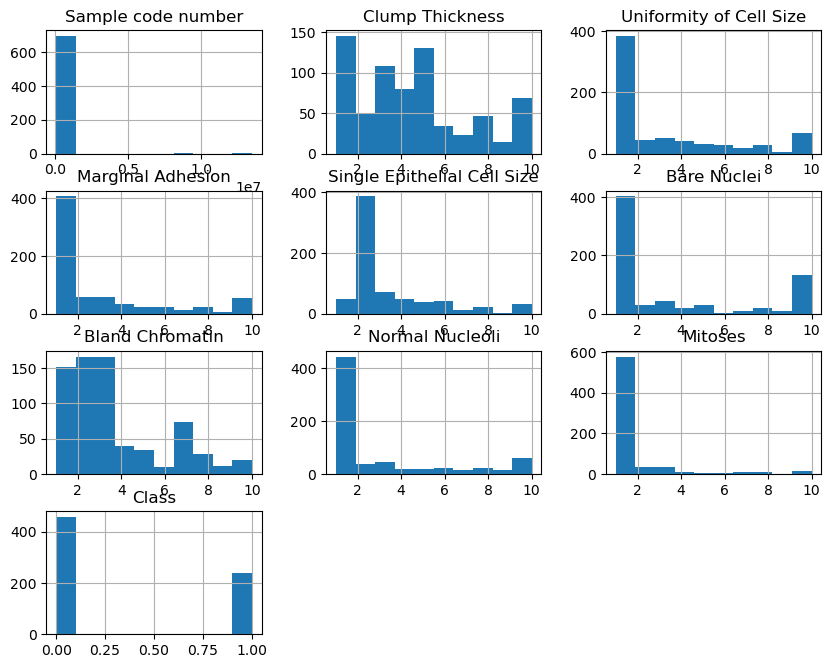

In [56]:
df2.hist()
plt.show()

Sample code number                 AxesSubplot(0.125,0.71587;0.227941x0.16413)
Clump Thickness                 AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Uniformity of Cell Size         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Marginal Adhesion                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Single Epithelial Cell Size    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Bare Nuclei                    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Bland Chromatin                   AxesSubplot(0.125,0.321957;0.227941x0.16413)
Normal Nucleoli                AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Mitoses                        AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Class                                AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

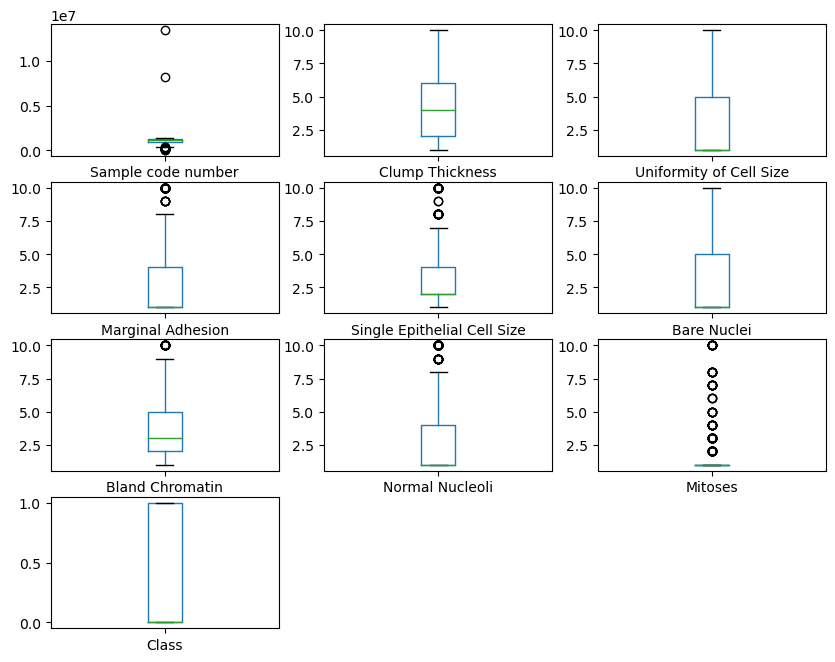

In [57]:
df2.plot(kind='box', subplots=True, layout=(4,3), sharex=False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

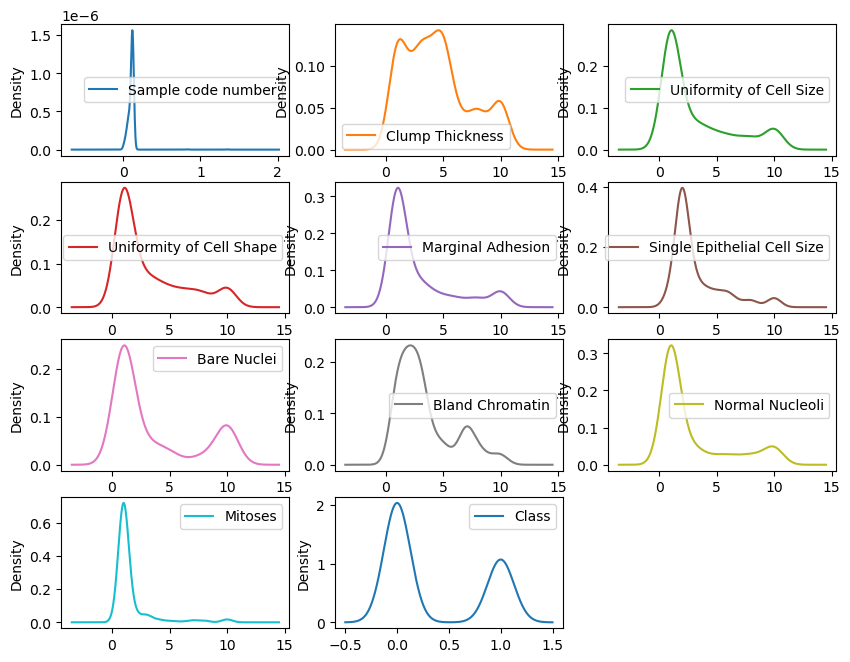

In [58]:
df1.plot(kind='density', subplots=True, layout=(4,3), sharex=False)

In [59]:
df1.drop("Sample code number",inplace=True,axis=1)

In [60]:
df1

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


# Training and Testing Dataset 
***



In [61]:
X = df1.iloc[:,0:9].values
Y = df1.iloc[:,9].values
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

#### Normalizing the Data 

In [62]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

# Classification
***

We will try to implement following algortihms for Classification and then compare the performances of each model to find out which is the best algorithm for our data set : 

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

## Splitting the dataset into the Training set and Test set
***

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## K Nearest Neighbor(KNN)
***


In [64]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
max=-1
ans=0
A=0
for k in range(1,11):
    
    classifier1 = KNeighborsClassifier(n_neighbors = k)
    classifier1.fit(X_train, Y_train)
    Y_pred = classifier1.predict(X_test)
    A=metrics.accuracy_score(Y_test, Y_pred)
    print("For K=",k,"Accuracy is : ", A,sep=" ")
    if(A>max):
        max=A
        ans=k

print()
print("Best K is = ",ans, " with accuracy : ",max)

#Storing Best Accuracy in a variable to compare later with other algorithms

A=max

For K= 1 Accuracy is :  0.9571428571428572
For K= 2 Accuracy is :  0.9428571428571428
For K= 3 Accuracy is :  0.9714285714285714
For K= 4 Accuracy is :  0.9642857142857143
For K= 5 Accuracy is :  0.9642857142857143
For K= 6 Accuracy is :  0.9785714285714285
For K= 7 Accuracy is :  0.9785714285714285
For K= 8 Accuracy is :  0.9785714285714285
For K= 9 Accuracy is :  0.9714285714285714
For K= 10 Accuracy is :  0.9785714285714285

Best K is =  6  with accuracy :  0.9785714285714285


## Confusion matrix
***
Table that describes the performance of a classification model

In [65]:
from sklearn.metrics import confusion_matrix

# save confusion matrix and slice into four pieces
cm = confusion_matrix(Y_test, Y_pred)  
print(cm)

#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[83  2]
 [ 1 54]]


## Basic terminology

True Positives (TP): we correctly predicted that they do have malignant class type

True Negatives (TN): we correctly predicted that they  have bening class type

False Positives (FP): we incorrectly predicted that they do have malignant class type 

False Negatives (FN): we incorrectly predicted that they have bening class type

0: negative class (bening)
1: positive class (malignant)

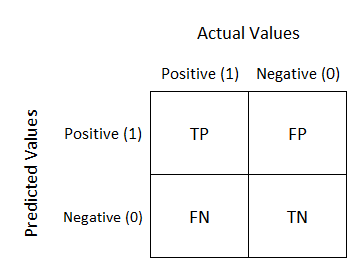

### Classification Error: Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [66]:
print((1 - max)*100,'%')

2.1428571428571463 %


### Sensitivity

- Also known as "True Positive Rate" or "Recall"
- TP / TP + FN
 

In [67]:
sensitivity = TP / float(FN + TP)
recall=sensitivity
print(sensitivity)

0.9818181818181818


### Specificity

- TN / TN + FP
  

In [68]:
specificity = TN / (TN + FP)

print(specificity)

0.9764705882352941


# Precision: When a positive value is predicted, how often is the prediction correct?

* How "precise" is the classifier when predicting positive instances?

In [69]:
precision = TP / float(TP + FP)

print(precision)

0.9642857142857143


# F1 Score

#### Evaluation metric for classification algorithms

* F1 score combines precision and recall relative to a specific positive class -The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0

In [70]:
# FORMULA
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.972972972972973

In [105]:
print("Best KNN Accuracy Score is : ",A, "having K =",ans)

Best KNN Accuracy Score is :  0.9785714285714285 having K = 6


# Determing accuracy using K-fold cross validation

In [106]:
#Using K fold accuracy

from sklearn.model_selection import cross_val_score

model=KNeighborsClassifier(n_neighbors = ans)  #ans=6
#X=            #all columns except target column
#y=            #all target columns 
l=cross_val_score(model, X, Y, cv=5)
l
mean1=np.mean(l)
mean1

0.9599794450154162

## Decision Tree

In [107]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [108]:
Y_pred = classifier2.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

### Confusion Matrix

In [109]:
from sklearn.metrics import confusion_matrix

# save confusion matrix and slice into four pieces
cm = confusion_matrix(Y_test, Y_pred)  
print(cm)

#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[81  4]
 [ 5 50]]


In [110]:
B= metrics.accuracy_score(Y_test, Y_pred)
print("Decision Tree Accuracy Score is : ", B)



Decision Tree Accuracy Score is :  0.9357142857142857


### Classification Error

In [111]:
print((1 - B)*100,"%")

6.428571428571428 %


### Sensitivity

In [112]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9090909090909091


### Specificity

In [113]:
specificity = TN / (TN + FP)

print(specificity)

0.9529411764705882


In [114]:
# Using K-Cross Validation

from sklearn.model_selection import cross_val_score

model=classifier2  #ans=6
#X=            #all columns except target column
#y=            #all target columns 
l=cross_val_score(model, X, Y, cv=5)
l
mean2=np.mean(l)
mean2


0.9313360739979444

## Support Vector Machine
 

In [115]:
#Using SVC method of svm class to use Kernel SVM Algorithm

from sklearn.svm import SVC

classifier3 = SVC(kernel = 'rbf')  #kernel is a function that SVM will used internally
classifier3.fit(X_train, Y_train)

SVC()

In [116]:
Y_pred = classifier3.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [117]:
# Using K-Cross Validation

from sklearn.model_selection import cross_val_score

model=classifier3  #ans=6
#X=            #all columns except target column
#y=            #all target columns 
l=cross_val_score(model, X, Y, cv=5)
l
mean3=np.mean(l)
mean3

0.9642651593011304

### Confusion matrix

In [118]:
# save confusion matrix and slice into four pieces
cm = confusion_matrix(Y_test, Y_pred)  
print(cm)

#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[82  3]
 [ 1 54]]


In [119]:
C= metrics.accuracy_score(Y_test, Y_pred)
print("SVM Accuracy Score is : ",C )

SVM Accuracy Score is :  0.9714285714285714


### Classification Error


In [120]:
print((1 - C)*100,"%")

2.857142857142858 %


### Sensitivity

In [121]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9818181818181818


### Specificity

In [122]:
specificity = TN / (TN + FP)

print(specificity)

0.9647058823529412


### Logistic Regression

In [123]:
#Using Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression

classifier4 = LogisticRegression()
classifier4.fit(X_train, Y_train)

LogisticRegression()

In [124]:
Y_pred = classifier4.predict(X_test)
Y_pred


array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

### Confusion Matrix

In [125]:
# save confusion matrix and slice into four pieces
cm = confusion_matrix(Y_test, Y_pred)  
print(cm)

#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[82  3]
 [ 1 54]]


In [126]:
D=metrics.accuracy_score(Y_test, Y_pred)
print("Logistic Regression Accuracy Score is : ", D)

Logistic Regression Accuracy Score is :  0.9714285714285714


### Classification Error


In [127]:
print((1 - D)*100,"%")

2.857142857142858 %


### Sensitivity

In [128]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9818181818181818


### Specificity

In [129]:
specificity = TN / (TN + FP)

print(specificity)

0.9647058823529412


In [130]:
# Using K-Cross Validation

from sklearn.model_selection import cross_val_score

model=classifier4  #ans=6
#X=            #all columns except target column
#y=            #all target columns 
l=cross_val_score(model, X, Y, cv=5)
l
mean4=np.mean(l)
mean4

0.9656937307297019

# Comparing Accuracy of each algorithm (using confusion matrix)

In [131]:
print("KNN Accuracy Score : ",A*100, " K = ",ans)
print()
print("Decsion Tree Accuracy Score : ",B*100)
print()
print("SVM Accuracy Score : ",C*100)
print()
print("Logistic Regression Accuracy Score : ",D*100)



KNN Accuracy Score :  97.85714285714285  K =  6

Decsion Tree Accuracy Score :  93.57142857142857

SVM Accuracy Score :  97.14285714285714

Logistic Regression Accuracy Score :  97.14285714285714


# Comparing Accuracy of each algorithm (using k-fold cross validation)


In [132]:
print("KNN Accuracy Score : ",mean1*100, " K = ",ans)
print()
print("Decsion Tree Accuracy Score : ",mean2*100)
print()
print("SVM Accuracy Score : ",mean3*100)
print()
print("Logistic Regression Accuracy Score : ",mean4*100)

KNN Accuracy Score :  95.99794450154162  K =  6

Decsion Tree Accuracy Score :  93.13360739979444

SVM Accuracy Score :  96.42651593011304

Logistic Regression Accuracy Score :  96.5693730729702
